# Quelques exemples de fonctions d'activation de base



### Activation functions

### Linear  :  Fonction d'activation linéaire

C'est une fonction simple de la forme: f(x) = ax ou f(x) = x. En gros, l'entrée passe à la sortie sans une très grande modification ou alors sans aucune modification. 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6, 0.1)
def linear(x):
    a = []
    for item in x:
        a.append(item)
    return a

y = linear(x)

plt.plot(x,y)
plt.grid()
plt.show()


<Figure size 640x480 with 1 Axes>

### Sigmoid

En mathématiques, la fonction sigmoïde (dite aussi courbe en S) est définie par :

$$ f(x)=\frac{1}{1 + e^{- x}}$$ pour tout réel x ;


Le but premier de la fonction est de réduire la valeur d'entrée pour la réduire entre 0 et 1. En plus d'exprimer la valeur sous forme de probabilité, si la valeur en entrée est un très grand nombre positif, la fonction convertira cette valeur en une probabilité de 1. A l'inverse, si la valeur en entrée est un très grand nombre négatif, la fonction convertira cette valeur en une probabilité de 0. D'autre part, l'équation de la courbe est telle que, seules les petites valeurs influent réellement sur la variation des valeurs en sortie.

La fonction Sigmoïde a plusieurs défaults:

- Elle n'est pas centrée sur zéro, c'est à dire que des entrées négatives peuvent engendrer des sorties positives.

- Etant assez plate, elle influe assez faiblement sur les neurones par rapport à d'autres fonctions d'activations. Le résultat est souvent très proche de 0 ou de 1 causant la saturation de certains neurones.

- Elle est couteuse en terme de calcul car elle comprend la fonction exponentielle.


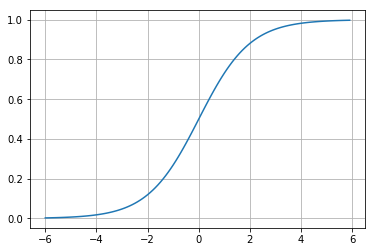

In [2]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/( (1+math.exp(-item) * 1))) 
        # ici j'ai pri A = 1 : plus A est grand plus on se rapproche à la fonction echelon ...
        
    return a

y = sigmoid(x)

plt.plot(x,y)
plt.grid()
plt.show()


### Tahn :  Tangente Hyperbolique 

Cette fonction ressemble à la fonction Sigmoïde. La différence avec la fonction Sigmoïde est que la fonction Tanh produit un résultat compris entre -1 et 1. La fonction Tanh est en terme général préférable à la fonction Sigmoïde car elle est centrée sur zéro. Les grandes entrées négatives tendent vers -1 et les grandes entrées positives tendent vers 1.

Mis à part cet avantage, la fonction Tanh possède les mêmes autres inconvénients que la fonction Sigmoïde.

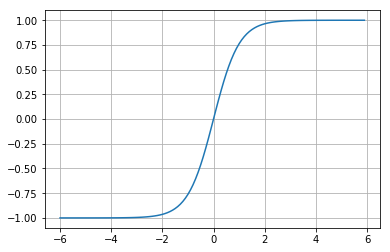

In [3]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)


y = tanh(x)

plt.plot(x,y)
plt.grid()
plt.show()

### ReLU : Unité de Rectification Linéaire
Pour résoudre le problème de saturation des deux fonctions précédentes (Sigmoïde et Tanh) il existe la fonction ReLU (Unité de Rectification Linéaire). Cette fonction est la plus utilisée.

La fonction ReLU est inteprétée par la formule: f(x) = max(0, x). Si l'entrée est négative la sortie est 0 et si elle est positive, alors la sortie est égale à x. Cette fonction d'activation augmente considérablement la convergence du réseau et ne sature pas.

Mais la fonction ReLU n'est pas parfaite. Si la valeur d'entrée est négative, le neurone reste inactif, ainsi les poids ne sont pas mis à jour et le réseau n’apprend pas.

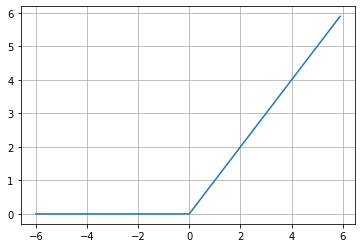

In [7]:
def relu(x):
    a = []
    for item in x:
        if item > 0:
            a.append(item)
        else:
            a.append(0)
    return a


y = relu(x)

plt.plot(x,y)
plt.grid()
plt.show()

## Construire un modèle de réseaux de neurones 

In [4]:
import tensorflow as tf
from tensorflow import keras
print (tf.__version__)
keras.__version__

1.15.0


'2.2.4-tf'

In [11]:
import pandas as pd

df_train = pd.read_csv("/project/notebooks_masterCHPS_achemchem/fashion-mnist_train.csv")
df_test = pd.read_csv("/project/notebooks_masterCHPS_achemchem/fashion-mnist_test.csv")







### Question : 
    créer les X_train, y_train , x_test et y_test

In [27]:
# On sépare la classe (label) des données (pixels)



In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Rescaler notre data frame :

In [10]:
x_train = x_train.reshape(60000, 784) #  28*28
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Déclaration de Modèle NN : 

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

# Declaration du modèle en Tensorflow2.0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='sigmoid', input_dim =(784)))#input_shape(784,)
model.add(tf.keras.layers.Dense(10, activation='softmax'))



# Déclaration du modèle Tensorflow 1.?
#model = Sequential()
#model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
#model.add(Dense(10, activation='softmax'))

# résumé du modèle
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [13]:
batch_size = 100
#num_classes = 10
epochs= 5

model.compile(loss='categorical_crossentropy',  optimizer='sgd',  metrics=['accuracy'])





In [14]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=1 )

#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# Je vous invite à lire la documentation : https://keras.io/models/sequential/

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 27us/sample - loss: 2.1886 - accuracy: 0.2734 - val_loss: 2.0313 - val_accuracy: 0.4653
Epoch 2/5
54000/54000 [==============================] - 1s 19us/sample - loss: 1.9185 - accuracy: 0.4976 - val_loss: 1.7827 - val_accuracy: 0.5730
Epoch 3/5
54000/54000 [==============================] - 1s 20us/sample - loss: 1.7007 - accuracy: 0.5796 - val_loss: 1.5739 - val_accuracy: 0.6418
Epoch 4/5
54000/54000 [==============================] - 1s 19us/sample - loss: 1.5182 - accuracy: 0.6335 - val_loss: 1.3983 - val_accuracy: 0.6892
Epoch 5/5
54000/54000 [==============================] - 1s 18us/sample - loss: 1.3657 - accuracy: 0.6779 - val_loss: 1.2531 - val_accuracy: 0.7342


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=0)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 1.2790955814361573
Test accuracy: 0.7168


## Exercice : 
On a obtenu avec ce modèle basique, un taux d'accuracy égale à 91.15%.
- Essayer d'améliorer la performence du modèle, en modifiant les fonctions d'activation, ou/et en n ajoutant le nombre de neurones et des couches intermédiaires.

